## 1) Import Required Liberary

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt

## 2) Read and Explore Dataset

In [2]:
ipldata = pd.read_csv("matches.csv")
ipldata.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
ipldata.shape

(756, 18)

## 3) Data Analysis and Visualization

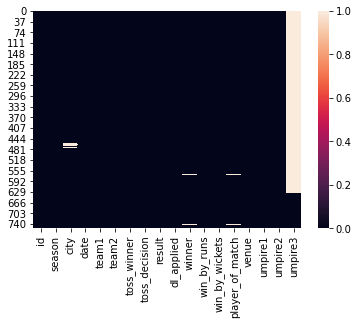

In [4]:
sn.heatmap(ipldata.isnull())

In [5]:
ipldata.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
ipldata["team1"].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

## 4) Data Preprocessing

### Remove Unnecessary Columns

In [7]:
ipldata.drop(labels=['id','dl_applied','win_by_runs',
       'win_by_wickets', 'player_of_match', 'umpire1', 'umpire2',
       'umpire3','result', 'date'], axis=1, inplace=True)

In [8]:
ipldata.head()

,season,city,team1,team2,toss_winner,toss_decision,winner,venue
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,Maharashtra Cricket Association Stadium
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,Saurashtra Cricket Association Stadium
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,Holkar Cricket Stadium
4,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,M Chinnaswamy Stadium


In [9]:
ipldata.replace({"Delhi Daredevils":"Delhi Capitals","Deccan Chargers":"Sunrisers Hyderabad"}, inplace=True)

In [10]:
constant_teams = ['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Delhi Daredevils',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [11]:
ipldataframe = ipldata[(ipldata['team1'].isin(constant_teams)) & (ipldata['team2'].isin(constant_teams))]

### Drop columns with Missing values

In [12]:
ipldataframe.dropna(how='any',axis = 0, inplace=True)

<ipython-input-12-9d40b77934f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipldataframe.dropna(how='any',axis = 0, inplace=True)


In [13]:
from sklearn.preprocessing import LabelEncoder
encoded_dataframe = LabelEncoder()
ipldataframe['team1'] = encoded_dataframe.fit_transform(ipldataframe['team1'])
ipldataframe['team2'] = encoded_dataframe.fit_transform(ipldataframe['team2'])
ipldataframe['toss_winner'] = encoded_dataframe.fit_transform(ipldataframe['toss_winner'])
ipldataframe['winner'] = encoded_dataframe.fit_transform(ipldataframe['winner'])

<ipython-input-13-d446e7edefaf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipldataframe['team1'] = encoded_dataframe.fit_transform(ipldataframe['team1'])
<ipython-input-13-d446e7edefaf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipldataframe['team2'] = encoded_dataframe.fit_transform(ipldataframe['team2'])
<ipython-input-13-d446e7edefaf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [14]:
city_encoder = LabelEncoder()
ipldataframe['city'] = city_encoder.fit_transform(ipldataframe['city'])
mapper = {'field': 0, "bat":1}
ipldataframe.replace(mapper, inplace=True)
venue_encode = LabelEncoder()
ipldataframe['venue'] = venue_encode.fit_transform(ipldataframe['venue'])

<ipython-input-14-513e490617b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipldataframe['city'] = city_encoder.fit_transform(ipldataframe['city'])
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-14-513e490617b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [15]:
ipldataframe.head()

,season,city,team1,team2,toss_winner,toss_decision,winner,venue
0,2017,14,7,6,6,0,7,25
4,2017,2,6,1,6,1,6,15
6,2017,21,3,4,4,0,4,36
7,2017,15,6,2,6,1,2,11
9,2017,21,7,4,4,0,4,36


In [16]:
X_train = ipldataframe[ipldataframe["season"] < 2018].drop(['season','winner'], axis = 1)
y_train = ipldataframe[ipldataframe["season"] < 2018]['winner']
X_test = ipldataframe[ipldataframe["season"] > 2017].drop(['season','winner'], axis = 1)
y_test = ipldataframe[ipldataframe["season"] > 2017]['winner']

In [17]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.fit_transform(X_test)

## 5) Model Selection

In [18]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf',random_state=10)
svm_model.fit(X_train, y_train)

SVC(random_state=10)

In [19]:
from sklearn.metrics import accuracy_score
ascore1= accuracy_score(y_test, svm_model.predict(X_test))
print("Accuracy of SVM Model :- ", ascore1*100,"%")

Accuracy of SVM Model :-  47.89915966386555 %


In [20]:
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(random_state= 10)
forest_classifier.fit(X_train, y_train)
ascore2= accuracy_score(y_test, forest_classifier.predict(X_test))
print("Accuracy of RandomForest Model :- ", ascore2*100,"%")

Accuracy of RandomForest Model :-  54.621848739495796 %
